# Python Object-Oriented Programming

- A Python class is a great way to keep related collections of functions and attributes labeled and organized
- Groups together data and behavior into one place
- Promotes modularization of programs
- Isolates different parts of the program from each other,

|Class|A blueprint for creating objects of a particular type|
|----------|-------------|
|Methods|Regular functions that are part of a class|
|Attributes|Variables that hold data that are part of class|
|Object|A specific instance of a class|
|Inheritance|Means by which a class can inherit capabilities from another|
|Composition|Means of building complex objects out of other objects|

In [1]:
class Dog:
    
    # static attributes (this attributes are unchanging with each instance)
    _legs = 4 # make this attribute as provate
    color = 'White'
    
    # Initialization function
    def __init__(self, name):
        self.name = name
        
    def get_legs(self):
        return self._legs
    
    # The self attribute means that I have access to any of the attributes or functions in this class
    def speak(self):
        print(self.name + ' Bark!')

my_dog = Dog('Alf')
another_dog = Dog('Ken')

my_dog.speak() # Alf Bark!
my_dog.color # 'White'
another_dog.speak() # Ken Bark!
another_dog.get_legs() # 4

Dog.color # 4 'White'

# Inheritance

class Chihuahua(Dog):
    
    # override parent's methods
    def speak(self):
        print(self.name + ' yap yap yap!')

chihuahua = Chihuahua('Roxy')
chihuahua.speak() # Roxy yap yap yap!

Alf Bark!
Ken Bark!
Roxy yap yap yap!


In [2]:
class WordSet:
    
    replace_puncs = ['!', '.']
    
    def __init__(self):
        self.words = set()
    
    # Instance methods
    def add_text(self, text):
        text = WordSet.clean(text)
        for word in text.split():
            self.words.add(word)
    
    # Static methods (without self attribute)
    def clean(text):
        # text = text.replace('!', '').replace('.', '') # chaining functions
        for punct in WordSet.replace_puncs:
            text = text.replace(punct, '')
        return text.lower()

word_set = WordSet()
word_set.add_text('Hi, I\'m Bryan! Here is a sentence I want to add!')
word_set.add_text('Here is another sentence I want to add.')

print(word_set.words) # {'bryan', 'i', 'add', 'hi,', 'to', 'is', 'another', 'want', 'a', 'sentence', 'here', "i'm"}

{'to', 'want', 'hi,', "i'm", 'add', 'another', 'bryan', 'sentence', 'i', 'is', 'here', 'a'}


## Class Methods and members

In [3]:
class Book:
    
    # properties defined at the class level are shared by all instances
    BOOK_TYPES = ("HARDCOVER", "PAPERBACK", "EBOOK")
    # double-underscore properties are hidden from other classes
    __book_list = None
    
    def __init__(self, title, author, pages, price, book_type):
        self.title = title
        self.author = author
        self.pages = pages
        self.price = price
        self.__secret = 'This is a secret attribute' # Properties with double underscores are hidden by the interpreter
        
        if not book_type in Book.BOOK_TYPES:
            raise ValueError(f'{book_type} is not a valid type')
        else:
            self.book_type = book_type
    
    def get_price(self):
        if hasattr(self, "_discount"): # Verfify if ab attribute exists in the class
            return self.price - (self.price * self._discount)
        else:
            return self.price
    
    # instance methods receive a specific object instance as an argument and operate on data specific to that object instance
    def set_discount(self, amount):
        self._discount = amount
    
    def set_title(self, new_title):
        self.title = new_title
    
    @classmethod
    def get_book_types(cls):
        return cls.BOOK_TYPES
    
    # static method
    def get_book_list():
        if Book.__book_list == None:
            Book.__book_list = []
        return Book.__book_list

first_book = Book('Title', 'Bryan A', 100, 25.5, "PAPERBACK")
print(first_book.get_price()) # 25.5
first_book.set_discount(0.25)
print(first_book.get_price()) # 19.125
# print(first_book.__secret) # 'Book' object has no attribute '__secret'
print(first_book._Book__secret) # This is a secret attribute
print(type(first_book)) # <class '__main__.Book'>
print(isinstance(first_book, Book)) # True - compare a specific instance to a known type
print("Book Types: ", Book.get_book_types())

# use static method to access a singleton object
the_books = Book.get_book_list()
the_books.append(first_book)

25.5
19.125
This is a secret attribute
<class '__main__.Book'>
True
Book Types:  ('HARDCOVER', 'PAPERBACK', 'EBOOK')


## Abstract base classes

Defines a template fot other classes to inherit from, but with a couple of twists

- First, you don't want consumers of your base class to be able to create instances of the base class itself
- You want to enforce the constraint that there are certains mathods in the base class that have to be implemented in subclasses

In [4]:
# Usin Abstract base classes to enforce class constraints

from abc import ABC, abstractmethod

class GraphicShape(ABC):
    def __init__(self):
        super().__init__()
    
    @abstractmethod
    def calc_area(self):
        pass

class Circle(GraphicShape):
    def __init__(self, radious):
        self.radious = radious
    
    def calc_area(self):
        return 3.14 * (self.radious ** 2)

class Square(GraphicShape):
    def __init__(self, side):
        self.side = side
        
    def calc_area(self):
        return self.side ** 2

# graphic_shape = GraphicShape() # Can't instantiate abstract class GraphicShape with abstract method calc_area

circle = Circle(10)
print(circle.calc_area())

square = Square(12)
print(square.calc_area())

314.0
144


## Interfaces

- Use a combination of multiple inheritance and abstract base classes to implement an interface
- Python doesn't have explicit languahe support for interfaces
- An interface is a kind of promise or a contract to provide a certain kind of behavior or capability

In [5]:
from abc import ABC, abstractmethod

class GraphicShape(ABC):
    def __init__(self):
        super().__init__()
    
    @abstractmethod
    def calc_area(self):
        pass

class JSONinfy(ABC):
    @abstractmethod
    def to_JSON(self):
        pass

class Circle(GraphicShape, JSONinfy):
    def __init__(self, radious):
        self.radious = radious
    
    def calc_area(self):
        return 3.14 * (self.radious ** 2)
    
    def to_JSON(self):
        return f"{{ 'Circle':  { str(self.calc_area()) } }}"

circle = Circle(10)
print(circle.calc_area()) # 314.0
print(circle.to_JSON()) # { 'Circle':  314.0 }

314.0
{ 'Circle':  314.0 }


## Composition

Using composition to build complex objects

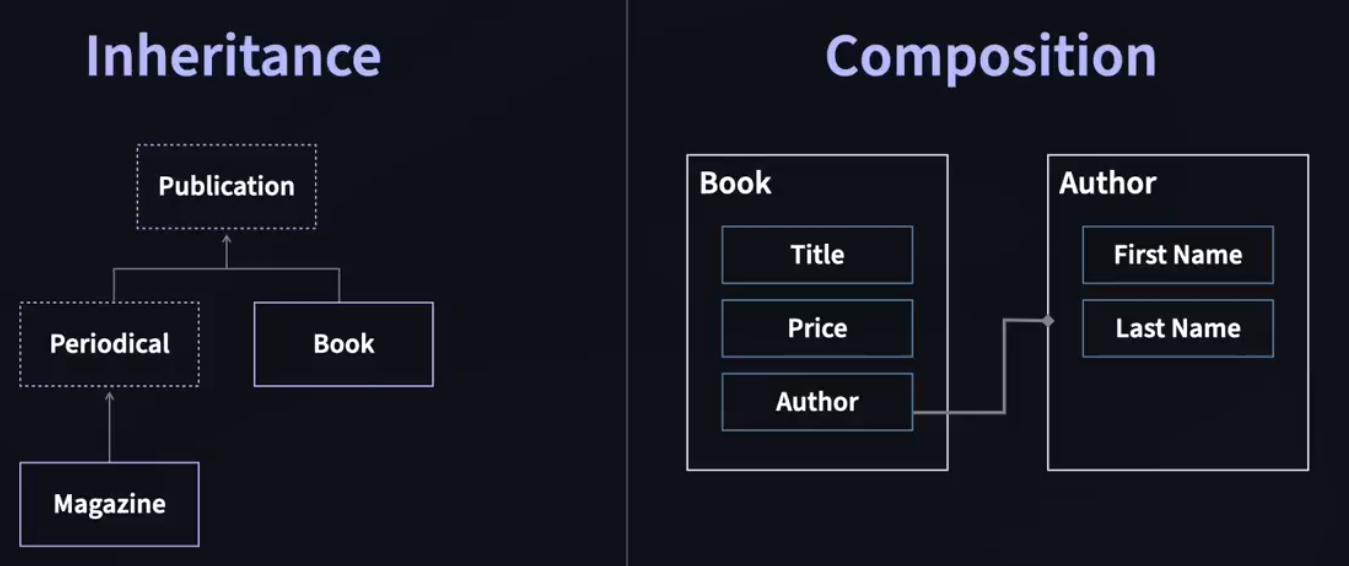

In [6]:
class Book:
    
    # without composition
    # def __init__(self, title, price, authorfname, authorlname):
    #    self.title = title
    #    self.price = price
    #    self.authorfname = authorfname
    #    self.authorlname = authorlname
    #    self.chapters = []
    
    # with composition
    def __init__(self, title, price, author = None):
        self.title = title
        self.price = price
        self.author = author
        self.chapters = []
    
    def add_chapter(self, name, pages):
        self.chapters.append((name, pages))

class Author:
    
    def __init__(self, firstname, lastname):
        self.firstname = firstname
        self.lastname = lastname
    
    def __str__(self):
        return f"{self.firstname} {self.lastname}"
        

author = Author('Bryan', 'Aguilar')
book = Book('Title', 39.0, author)
book.add_chapter('Chapter 1', 125)
book.add_chapter('Chapter 2', 97)

book.chapters # [('Chapter 1', 125), ('Chapter 2', 97)]
print(book.author) # Bryan Aguilar

Bryan Aguilar


## "Magic" Object methods

- A set of methods that Python automatycally associates with every class definition
- Classes can override these methods to customie a variety of behavior and integrate with the languaje
- Define how objects are represented as strings
- Control access to attribute values, both for get and set
- Build in comparison and equality testing capabilities
- Allow objects to be called like functions

In [7]:
# String representation of objects - using the __str__ and __rep__ magic methods

class Book:
    def __init__(self, title, author, price):
        self.title = title
        self.author = author
        self.price = price
    
    # use the __str__ method to return a string
    def __str__(self):
        return f"{self.title} by {self.author}, costs {self.price}"
    
    # use the __repr__ method to return a object representation
    def __repr__(self):
        return f"title = {self.title}, author = {self.author}, price = {self.price}"
        
book = Book('Title', "Bryan Aguilar", 39.0)
print(book) # Title by Bryan Aguilar, costs 39.0
print(str(book)) # Title by Bryan Aguilar, costs 39.0
print(repr(book)) # title = Title, author = Bryan Aguilar, price = 39.0

Title by Bryan Aguilar, costs 39.0
Title by Bryan Aguilar, costs 39.0
title = Title, author = Bryan Aguilar, price = 39.0


In [8]:
# Equality and comparison

class Book:
    def __init__(self, title, author, price):
        self.title = title
        self.author = author
        self.price = price
    
    # use the __eq__ method checks for equality between two objects
    def __eq__(self, value):
        if not isinstance(value, Book):
            raise ValueError("Can't compare book to a non-book")
        
        return (self.title == value.title and self.author == value.author and self.price == value.price)
    
    # use the __ge__ establishes >= relationship with another object
    def __ge__(self, value):
        if not isinstance(value, Book):
            raise ValueError("Can't compare book to a non-book")
        
        return self.price >= value.price
    
    # use the __lt__ establishes < relationship with another object
    def __lt__(self, value):
        if not isinstance(value, Book):
            raise ValueError("Can't compare book to a non-book")
        
        return self.price < value.price
        
b1 = Book('War and Peace', "Leo Tolstoy", 39.95)
b2 = Book('The Catcher in the Rye', "JD Salinger", 29.95)
b3 = Book('War and Peace', "Leo Tolstoy", 39.95)
b4 = Book('To Kill a Mocjingbird', "Harper Lee", 24.95)

# check for equality
print(b1 == b3) # True
print(b1 == b2) # False

# chack for grater and lesser value (by price)
print(b2 >= b1) # False
print(b2 < b1) # True

# sort instances
books = [b1, b3, b2, b4]
books.sort()
print([book.title for book in books]) # ['To Kill a Mocjingbird', 'The Catcher in the Rye', 'War and Peace', 'War and Peace']

True
False
False
True
['To Kill a Mocjingbird', 'The Catcher in the Rye', 'War and Peace', 'War and Peace']


In [9]:
# Attribute access

class Book:
    def __init__(self, title, author, price):
        self.title = title
        self.author = author
        self.price = price
        self.discount = 0.1
    
    # use the __getattribute__ called when an attr is retrieved. Don't directly access the attr name otherwise a recursive loop us created
    def __getattribute__(self, name):
        if name == "price":
            p = super().__getattribute__("price")
            d = super().__getattribute__("discount")
            return p - (p * d)
        
        return super().__getattribute__(name)
    
    # use the __setattr__ called when an attribute value is set. Don't set the attr directly here otherwise a recursive loop causes a crash
    def __setattr__(self, name, value):
        if name == "price":
            if type(value) is not float:
                raise ValueError("The 'price' attr must be a float")
        
        return super().__setattr__(name, value)
    
    # use the __getattr__ called when __getattribute__ lookup fails - you can pretty much generate attributes on the fly with this method
    def __getattr__(self, name):
        return name + " is not here!"
        
book = Book('Title', "Bryan Aguilar", 39.0)
print(book.price) # 35.1
# book.price = 40 # ValueError: The 'price' attr must be a float
book.randomprop # 'randomprop is not here!'

35.1


'randomprop is not here!'

In [10]:
# Callable objects

class Book:
    def __init__(self, title, author, price):
        self.title = title
        self.author = author
        self.price = price
    
    # use the __str__ method to return a string
    def __str__(self):
        return f"{self.title} by {self.author}, costs {self.price}"
    
    # the __call__ methd can be used to call the object like a function
    def __call__(self, title, author, price):
        self.title = title
        self.author = author
        self.price = price
        
b1 = Book('War and Peace', "Leo Tolstoy", 39.95)
b2 = Book('The Catcher in the Rye', "JD Salinger", 29.95)

print(b1)  # War and Peace by Leo Tolstoy, costs 39.95
b1("Anna Karenina", "Leo Tolstoy", 49.95)
print(b1) # Anna Karenina by Leo Tolstoy, costs 49.95

War and Peace by Leo Tolstoy, costs 39.95
Anna Karenina by Leo Tolstoy, costs 49.95


## Data classes

- Using data classes to represent data objects
- They also automatically implement both repr and eq magic methods

In [11]:
from dataclasses import dataclass

# @dataclass(frozen = True) # "frozen" parameter makes the class inmutable
@dataclass
class Book:
    title: str
    author: str = "No author"
    pages: int = 0
    price: float = 0.0
    
    def __post_init__(self):
        self.description = f"{self.title} by {self.author}, {self.pages}"
    
    def book_info(self):
        return f"{self.title}, by {self.author}"
        
b1 = Book('War and Peace', "Leo Tolstoy", 1225, 39.95)
b2 = Book('The Catcher in the Rye', "JD Salinger", 234, 29.95)
b3 = Book('War and Peace', "Leo Tolstoy", 1225, 39.95)
b4 = Book('New book')

b1 # Book(title='War and Peace', author='Leo Tolstoy', pages=1225, price=39.95)
b1 == b3 # True
b1 == b2 # False
b1.book_info() # 'War and Peace, by Leo Tolstoy'
b1.description # 'War and Peace by Leo Tolstoy, 1225'
b4 # Book(title='New book', author='No author', pages=0, price=0.0)

Book(title='New book', author='No author', pages=0, price=0.0)